In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


[153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 21, 22, 23, 24, 46, 47, 48, 49, 97, 107, 117, 127] total 24
percent has 12000 values
comp has 12000 values
folds has 12000 values
unlab has 12000 values
score has 12000 values
feats has 12000 values


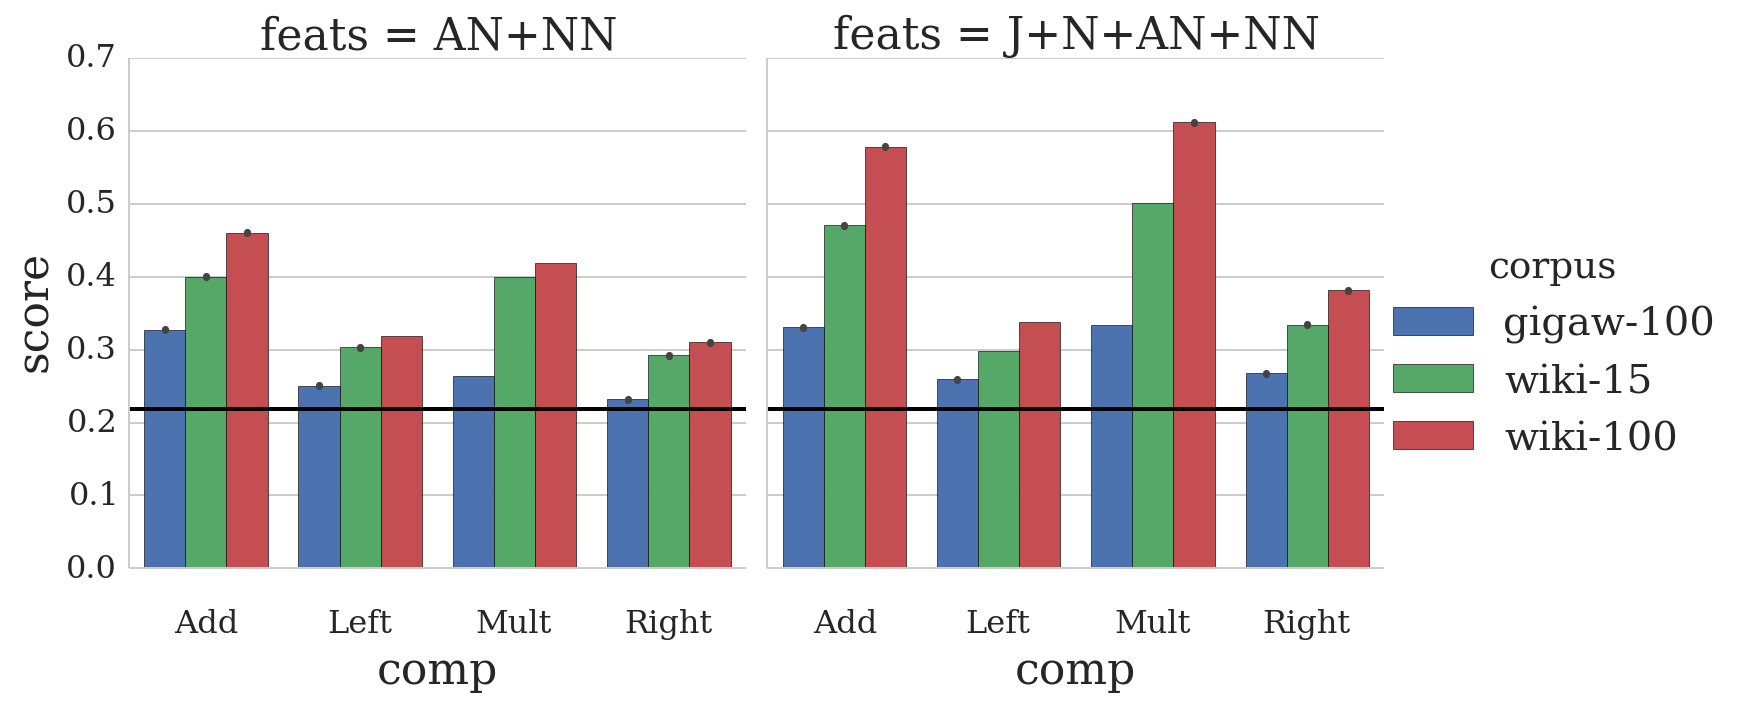

In [2]:
%autoreload
# settings_of(153)
s = {'document_features_ev': 'J+N+AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__allow_overlap': 0,
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled__in': ['gigaw', 'wiki'],
     'expansions__vectors__unlabelled_percentage__in': [15, 100],
     'expansions__vectors__use_ppmi': 0,
     'labelled': 'amazon_grouped-tagged'}
ids = list(Experiment.objects.filter(**s).values_list('id', flat=True))
s['document_features_ev'] = 'AN+NN'
ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
s['document_features_ev'] = 'AN'
ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
s['document_features_ev'] = 'AN'
ids += list(Experiment.objects.filter(**s).values_list('id', flat=True))
print(ids, 'total', len(ids))

fields = {  'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'comp': 'expansions__vectors__composer',
            'feats': 'document_features_ev'}
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
g= sns.factorplot(y='score', x='comp', hue='corpus', col='feats', 
                   hue_order=sort_df_by(df, 'corpus'), col_wrap=2,
                   data=df, kind='bar');

for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');